# udcaity nanodegree capstone project in machine learning

# bank marketing campaign

The data we have describes the details about a customer like his age,job,martial status etc and we have taken these things as our inputs to the data and i decided to predict whether a customer responds to the campaign or not based on the data provided we have and we used to predcit the variable 'y'

Here, i used my benchmark model as Xgboost and i used the many classification algorithms like naive_bayes,decision tree classifier,and so on

# importing the modules required for the data

I imported the modules required to my data to proceed

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
%matplotlib inline

I used to load the data which was saved in the file name called as bank_full.csv in this step

In [60]:
# Load the dataset
full_data = pd.read_csv("bank-full.csv", sep=';')
print("data read sucessfully")

data read sucessfully


In [61]:
#looking at the columns present in the data
full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [62]:
#looking at the shape of the data
full_data.shape

(45211, 17)

In [63]:
#looking at the data
full_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


I used to delete the missing values i found them in the data but when i look at the data it has unknown values 

In [65]:
#obtaining information about the data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Getting a idea at the basic values of the data set is important so i used to have an idea about the data set by exlporing the number of clients,subscribers and also non-subscribers

# basic values of data set

In [66]:
clients = len(full_data.index)
features = full_data.shape[1]
subscribe = len(full_data[full_data.y=="yes"].index)
nosubscribe= len(full_data[full_data.y=="no"].index)
subscribe_rate = (subscribe/clients)*100
print("The Total number of clients present in the data set are: {}".format(clients))
print("The Number of clients that did subscribe are: {}".format(subscribe))
print ("The Number of clients that did not subscribe are: {}".format(nosubscribe))
print ("The Number of features are: {}".format(features-1))
print ("The Current subscription rate of the bank are: {:.2f}%".format(subscribe_rate))

The Total number of clients present in the data set are: 45211
The Number of clients that did subscribe are: 5289
The Number of clients that did not subscribe are: 39922
The Number of features are: 16
The Current subscription rate of the bank are: 11.70%


Splitting the data into the feature and the target data was important to solve the problem because we used to predcit the target value only through the feature data

# splitting of data into feature and target data

In [67]:
# Extraction features as (X) and target values as (y)
feature_col = full_data.columns[:-1]  # all columns but last are features
target_col = full_data.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_col))
print ("Target column: {}".format(target_col))
X_all = full_data[feature_col]  
y_all = full_data[target_col]   
print("FEATURE CLOUMNS ARE ")
print (X_all.head()) # print the first 5 rows
print("TARGET VALUES ARE")
print (y_all.head())

Feature column(s):-
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
Target column: y
FEATURE CLOUMNS ARE 
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown

Now,we predcit that the feature data has 16 features and target data has 1 feature which we want to predcit that knowing the feature data only.

# statistical summary of data set

The describe() in pandas was used to get some basic statistical information about the data like mean,median,standard deviation,minimum,maximum etc but it can be done only on the numbers only some attributes of data are returned which have inputs as numbers

In [68]:
display(full_data.describe())

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# checking whether the data set contain the null values

In [69]:
full_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

visualsing the data was very important to get a quick review about the data in a effective way so i go through the data inorder to visualise the things in the various ways like histogram,barchart,heatmap etc

# visualising the data

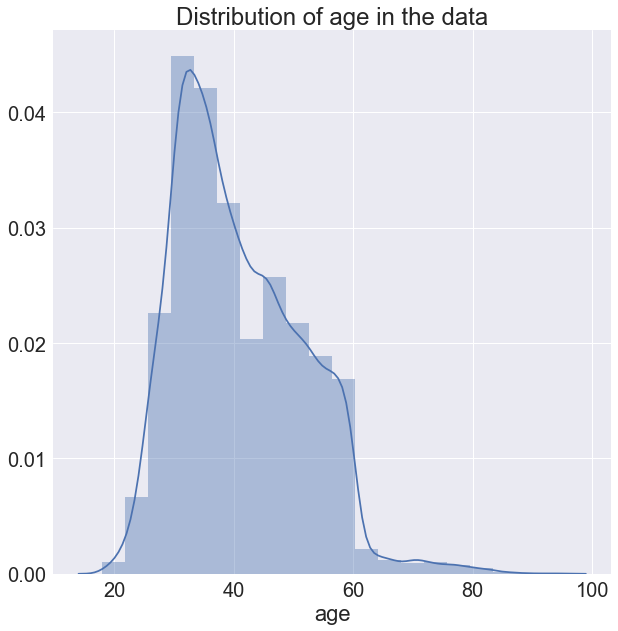

In [70]:
#histogram representation of data
h = sns.distplot(full_data['age'], bins=20, kde=True)
plt.title('Distribution of age in the data')
h.figure.set_size_inches(10,10)

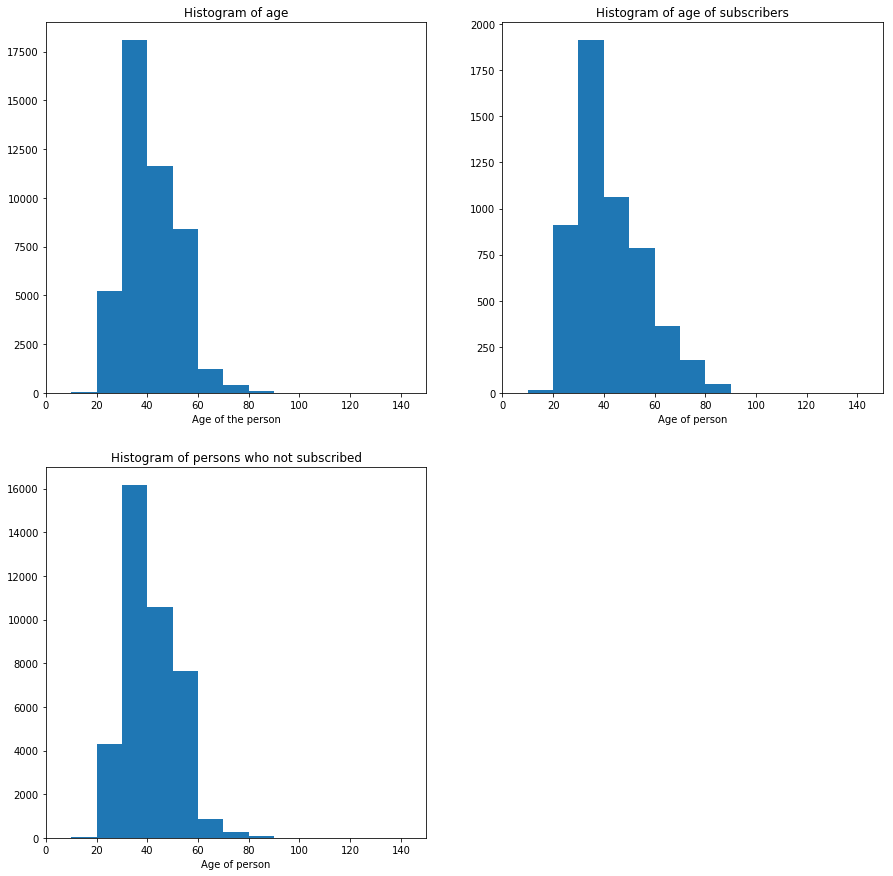

In [13]:
# here the visulaisation for the data was between the age and the age of persons and also who subscribed and also the persons who not subscribed for the data
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.xlim(0, 150)
plt.hist(X_all['age'], bins=range(0,100,10))
plt.xlabel('Age of the person')
plt.title('Histogram of age')
plt.subplot(2, 2, 2)
plt.xlim(0, 150)
subscribers = full_data[full_data['y']=='yes']
plt.hist(subscribers['age'], bins=range(0,100,10))
plt.xlabel('Age of person')
plt.title('Histogram of age of subscribers')
plt.subplot(2, 2, 3)
plt.xlim(0, 150)
nonsubscribers = full_data[full_data['y']=='no']
plt.hist(nonsubscribers['age'], bins=range(0,100,10))
plt.xlabel('Age of person')
plt.title('Histogram of persons who not subscribed')
plt.show()

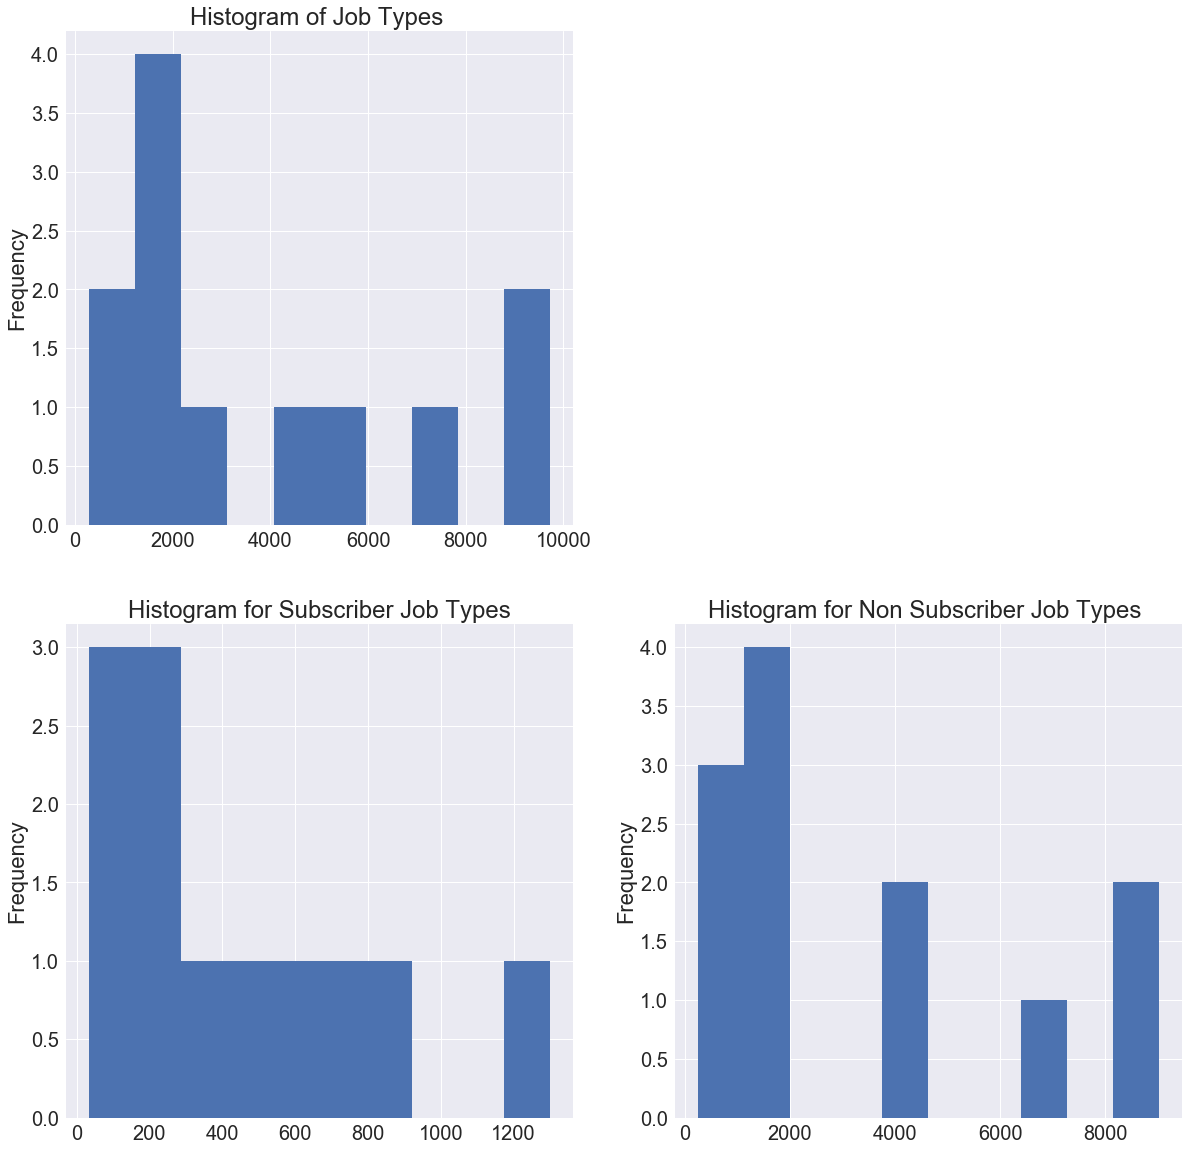

In [71]:
#the histogram of job type and the subscribers as well as non subscribers
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.title('Histogram of Job Types ')
jobs = X_all['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')
plt.subplot(2, 2, 3)
plt.title('Histogram for Subscriber Job Types')
jobs = subscribers['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')
plt.subplot(2, 2, 4)
plt.title('Histogram for Non Subscriber Job Types ')
jobs = nonsubscribers['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')

plt.show()

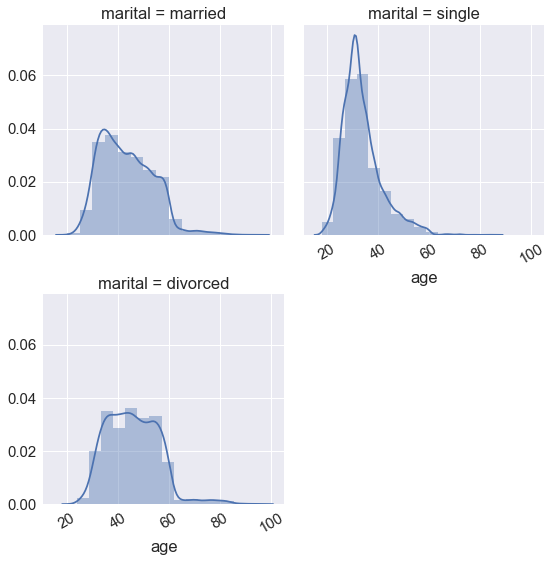

In [15]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(full_data, col="marital", col_wrap=2, size=4, aspect=1)  
g.map(sns.distplot, "age", bins=15).set_xticklabels(rotation=30)

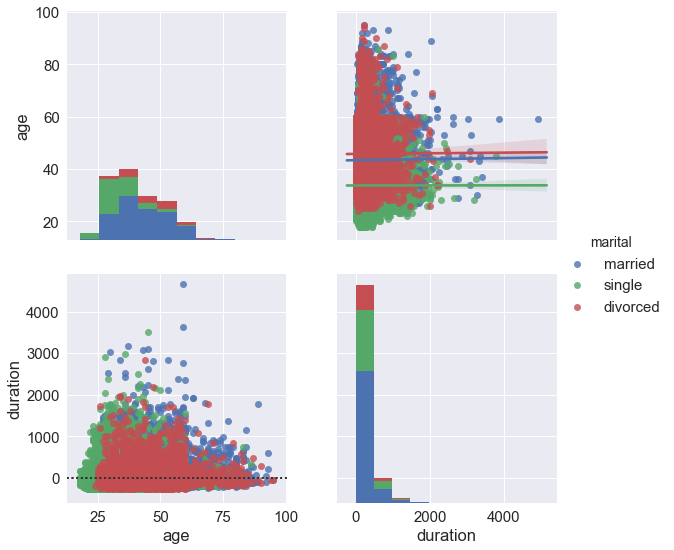

In [72]:
sns.set(font_scale=1.5)
a= sns.PairGrid(full_data[["age", "duration", "marital"]], hue="marital", size=4)  
a.map_upper(sns.regplot)  
a.map_lower(sns.residplot)  
a.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
a.add_legend()  
a.set(alpha=0.5)

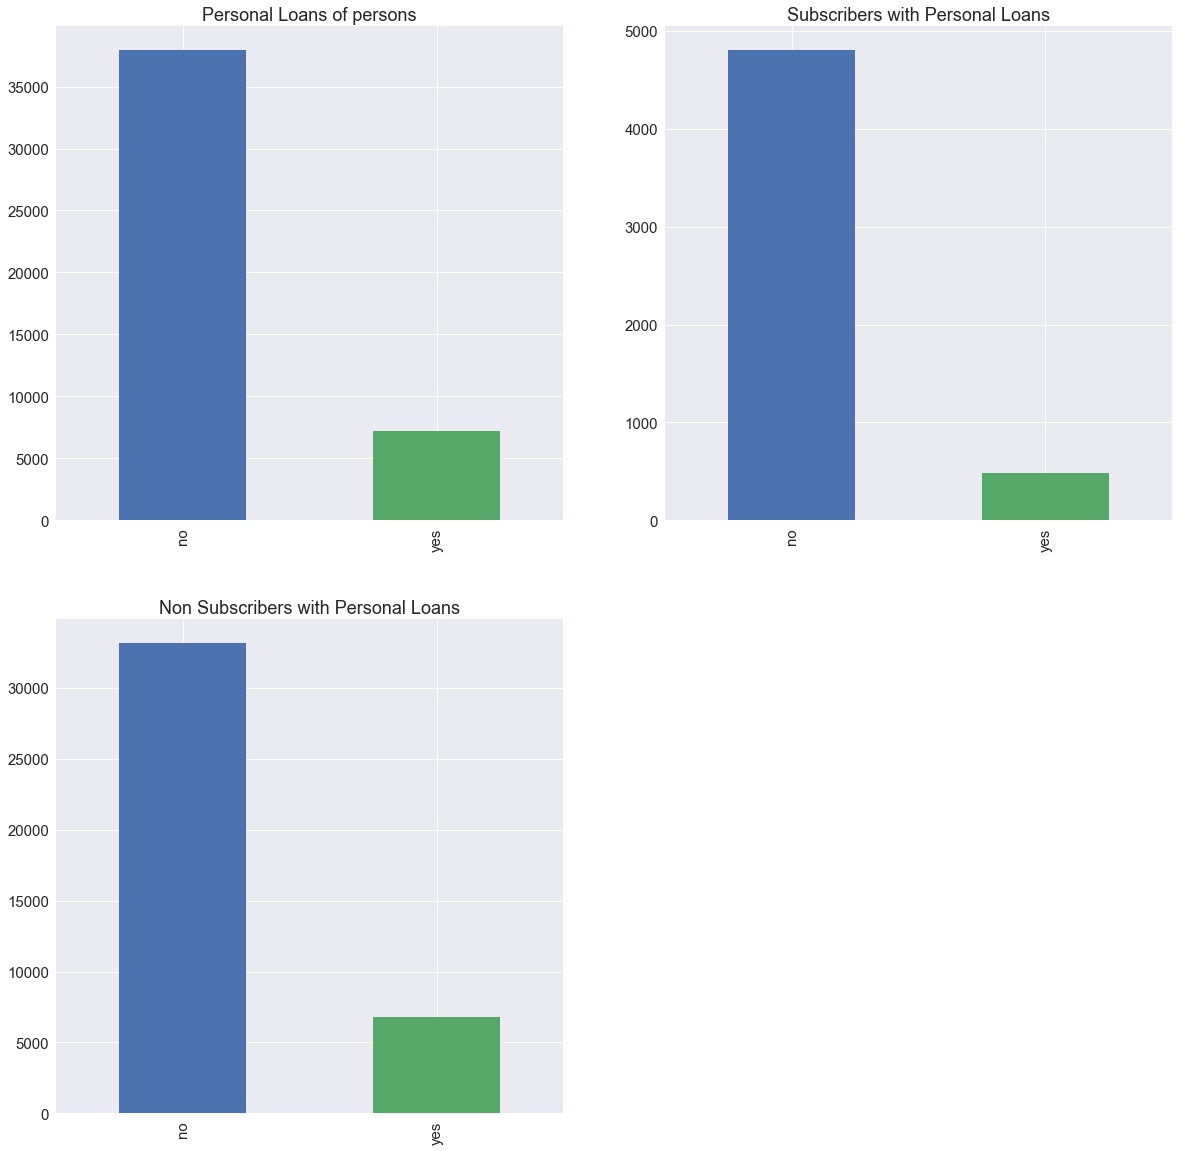

In [73]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Personal Loans of persons')
loan = X_all['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title('Subscribers with Personal Loans')
loan = subscribers['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Non Subscribers with Personal Loans')
loan = nonsubscribers['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.show()

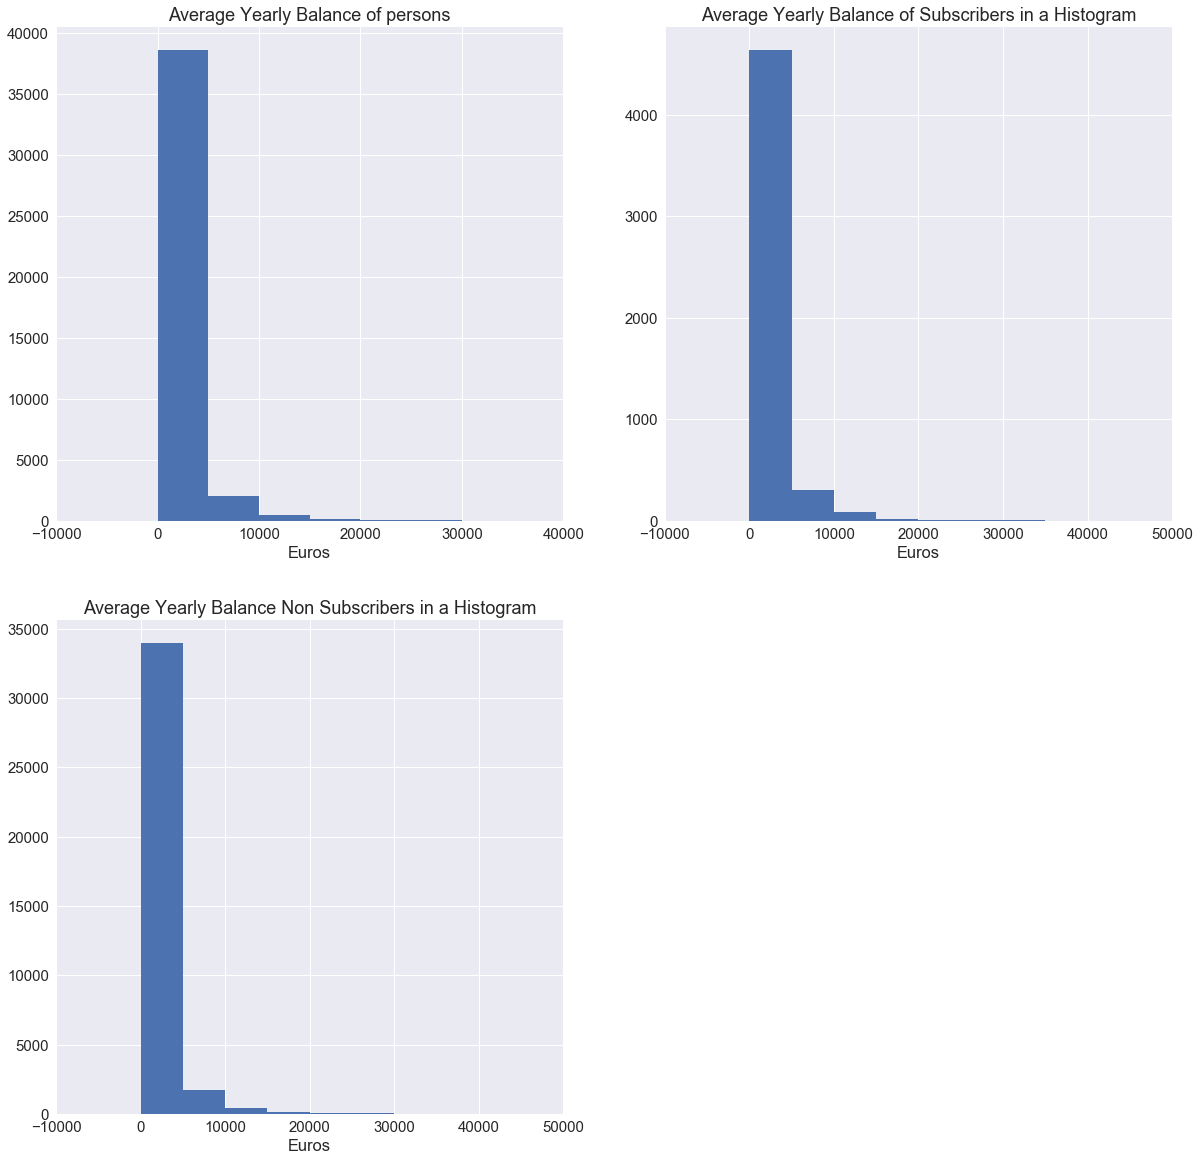

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.xlim(-10000, 40000)
plt.hist(X_all['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance of persons')

plt.subplot(2, 2, 2)
plt.xlim(-10000, 50000)
plt.hist(subscribers['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance of Subscribers in a Histogram')

plt.subplot(2, 2, 3)
plt.xlim(-10000, 50000)
nonsubscribers = full_data[full_data['y']=='no']
plt.hist(nonsubscribers['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance Non Subscribers in a Histogram')

plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

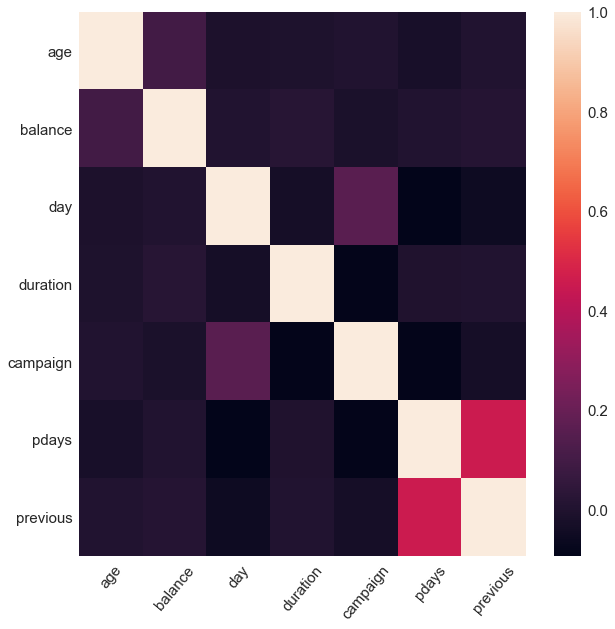

In [74]:
# visulize correlations of features with a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(full_data.corr())
plt.xticks(rotation=50)
plt.yticks(rotation=0)

# preprocessing of data

This step was a crucial step because the pre-processing refers to the transformations applied to our data before feeding it to the algorithm.
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [20]:
def preprocess(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    out = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        out= out.join(col_data)
    
    return out
full_data=preprocess(full_data)
print("FEATURES COLUMNS AFTER PREPROCESSING IS",full_data)

FEATURES COLUMNS AFTER PREPROCESSING IS        age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0       58           0                0                 0              0   
1       44           0                0                 0              0   
2       33           0                0                 1              0   
3       47           0                1                 0              0   
4       33           0                0                 0              0   
5       35           0                0                 0              0   
6       28           0                0                 0              0   
7       42           0                0                 1              0   
8       58           0                0                 0              0   
9       43           0                0                 0              0   
10      41           1                0                 0              0   
11      29           1                0         

# identifying the feature and target columns in the data

After preprocessing of data it was needed to find the feature and target columns on the data because the data now was converted into the structured data rather than unstructured data

In [21]:
# Extract feature columns
feature_col = list(full_data.columns[:-1])

# Extract target column 'responded'
target_col = full_data.columns[-1] 

# Show the list of columns
print("Feature columns are:{}".format(feature_col))
print("Target columns are: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = full_data[feature_col]
y_all = full_data[target_col]

# Show the feature information by printing the first five rows
print("Feature values:")
print(X_all.head(5))

Feature columns are:['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'default', 'balance', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'day', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_other', 'poutcome_success']
Target columns are: y
Feature values:
   age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58           0                0                 0              0   
1   44           0                0                 0              0   
2   33           0                0                 1   

# checking for missing values after featuring the data

Here,we are checking whether we have missimg values after the preprocessing of data.

In [22]:
X_all.isnull().sum()

age                    0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
default                0
balance                0
housing                0
loan                   0
contact_cellular       0
contact_telephone      0
day                    0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
duration               0
campaign               0
pdays                  0


# training and validation of data

splitting the data into the training data set and testing data was prime necessary step for the data to split and test the data here i used the validation_size as 0.40 and found that the training ser has 27126 and testing set as 18085

In [23]:
validation_size = 0.40
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_all, y_all, stratify = y_all, 
                                                    test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation  set 'yes' pct = {:.2f}%".format(100 * (y_validation == 1).mean()))

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_validation.shape[0]))

Train set 'yes' pct = 11.70%
Validation  set 'yes' pct = 11.70%
Training set has 27126 samples.
Validation set has 18085 samples.


# testing of benchmark model accuarcy  xgboost

I have chossen the benchmark model as XGboost classifier so i go through it to find the accuracy of the model

In [76]:
# Test to check how XGBoost compares with SKLearn wrapper
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier()
param = clf.get_xgb_params()
clf.fit(X_train, y_train)
preds_sk = clf.predict(X_validation)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_validation)
bst = xgb.train(param, dtrain)
print("The Accuracy of XGBoost was is: ",accuracy_score(y_validation, preds.round()))

C:\Users\Admin\.VPN Unlimited\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The Accuracy of XGBoost was is:  0.8998064694498203


I predcited the accuracy of bench mark model as 0.899 and after all the process i would like to improve the performance of my model by tuning the model,tuning the parameters and much more.

Now i would like to build the models based on the below algorithms like:
1.GAUSSIAN NAIVE_BAYES
2.DECISION TREE CLASSIFIER 
3.RANDOM FOREST
4.ADABOOST CLASSIFIER

# buliding of models

In [84]:
#checking of various algorithms
alg = []
alg.append(('  NB',GaussianNB()))
alg.append(('  DT',DecisionTreeClassifier()))
alg.append(('  RandomF', RandomForestClassifier(n_estimators=100)))
alg.append(('  AdaBoost', AdaBoostClassifier(RandomForestClassifier(n_estimators=100), 
                                        algorithm='SAMME',n_estimators=100, learning_rate=1.0)))
#models.append(('5. XGB', XGBClassifier()))
# Evaluate each model in turn
res= []
names = []
print("Accuracy and error is")
for name, model in alg:
    kfold = model_selection.KFold(n_splits =20, random_state = 123)
    cv_res= model_selection.cross_val_score(model, X_train, y_train,
                                                cv = kfold, 
                                                 scoring='accuracy')
    res.append(cv_res)
    names.append(name)
    m = "%s: %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print(m)

Accuracy and error is
  NB: 0.867581 (0.009588)
  DT: 0.874032 (0.008565)
  RandomF: 0.904519 (0.007161)
  AdaBoost: 0.904593 (0.006638)


comparing the algorithms which we have choosen for the best accuracy rate and minimum error rate and we will visualise it to predict the best performer of an algorithm

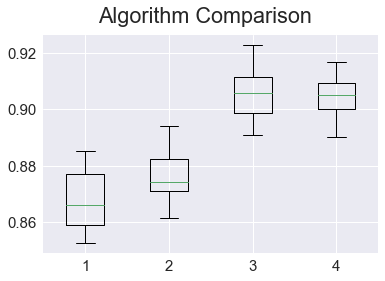

1.GaussianNB
2.Decision tree classifer
3.Rndom Forest
4.AdaBoost Classifier


In [83]:
# Comparison Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
plt.show()
print("1.GaussianNB")
print("2.Decision tree classifer")
print("3.Rndom Forest")
print("4.AdaBoost Classifier")

**From the graph we clearly observe that the Naive bayes algorithm was slower in performance and we can observe the high performance of Random Forest and AdaBoost classifer and both are performing nearly equally.

# predictions on validation set

In [32]:
# Select best model
# Make predictions on validation dataset
xg = XGBClassifier()
fit = xg.fit(X_train, y_train)
xgb.pred = xg.predict(X_validation)
print("Accuracy Score: ",accuracy_score(y_validation, xgb.pred))
print("Confusion Matrix:",confusion_matrix(y_validation, xgb.pred))
print("Classification Report:",classification_report(y_validation, xgb.pred))

Accuracy Score:  0.9046723804257673
Confusion Matrix: [[15565   404]
 [ 1320   796]]
Classification Report:              precision    recall  f1-score   support

          0       0.92      0.97      0.95     15969
          1       0.66      0.38      0.48      2116

avg / total       0.89      0.90      0.89     18085



C:\Users\Admin\.VPN Unlimited\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# tuning the model for better performance

Tuning is usually a trial-and-error process by which you change some hyperparameters (for example, the number of trees in a tree-based algorithm or the value of alpha in a linear algorithm), run the algorithm on the data again, then compare its performance on your validation set in order to determine which set of hyperparameters results in the most accurate model.

In [85]:
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

# fit model
model = XGBClassifier(seed = 123)
model.fit(X_train, y_train)

# printing the model for visualization
print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)


# tuning of parameters

Machine Learning has a foundation built from several sophisticated models. Every such model has a set of keys called parameters which run them. Each parameter is set to a default value which can be changed as per requirement (say, based on some scoring metric).

Now, every real world data set is different and needs to be worked on differently. If the same model with a strict parameter set is applied on every data, a good result cannot be expected uniformly in all cases. Thus, these parameters must be adjusted in such a manner that the best predictions can be achieved by the model for every individual data set which comes by.

This very technique of adjusting the elements which control the behavior of a given model is called parameter tuning.

In [33]:
from sklearn.model_selection import GridSearchCV
# Tuning of an objective
param_set0 = {
    'objective': ('reg:linear', 'binary:logistic','count:poisson')
}

xg0 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=123)

gsearch1 = GridSearchCV(estimator=xg0, param_grid=param_set0, scoring='roc_auc', n_jobs=5, cv=4) #verbose=2
gsearch1.fit(X_train, y_train)
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'mean_fit_time': array([3.58357489, 6.01781261, 4.71885175]), 'std_fit_time': array([0.78338106, 0.06373241, 0.53976427]), 'mean_score_time': array([0.04022998, 0.03913695, 0.03157401]), 'std_score_time': array([0.00866136, 0.00579069, 0.00607166]), 'param_objective': masked_array(data=['reg:linear', 'binary:logistic', 'count:poisson'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'objective': 'reg:linear'}, {'objective': 'binary:logistic'}, {'objective': 'count:poisson'}], 'split0_test_score': array([0.92871902, 0.92173498, 0.9087785 ]), 'split1_test_score': array([0.92417264, 0.91475711, 0.90217088]), 'split2_test_score': array([0.92341672, 0.9133772 , 0.89844359]), 'split3_test_score': array([0.92724815, 0.91785884, 0.90827325]), 'mean_test_score': array([0.92588934, 0.91693238, 0.90441688]), 'std_test_score': array([0.00217459, 0.00321318, 0.00431915]), 'rank_test_score': array([1, 2, 3]), 'split0_train_score': array([0.935

In [34]:
# Tuning of both max_depth and min_child_weight parameters

param_test1 = {
    'max_depth': [3,4,5,6,7,8,9],
    'min_child_weight': [2,3,4,5,6,7]
}

xgb1 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear')
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring = 'roc_auc', n_jobs = 5, 
                        iid = False, cv = 4)
gsearch1.fit(X_train,y_train)

#print(gsearch1.grid_scores
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 5, 'min_child_weight': 6}
0.9301197923676505


In [39]:
# Tuning of  gamma
param_test2 = {
    'gamma':[i/10.0 for i in range(1,20,1)]
}

xgb2 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=6)
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring = 'roc_auc',n_jobs = 5,
                         iid = False, cv = 4)
gsearch2.fit(X_train,y_train)

print(gsearch2.cv_results_)
print(gsearch2.best_score_)

{'mean_fit_time': array([6.1975373 , 8.95458573, 8.36298984, 8.73738974, 8.49260521,
       8.47475189, 8.47330183, 8.30389708, 8.70961356, 8.31715059,
       8.74149334, 8.41788238, 8.45468354, 8.39039814, 8.47096914,
       8.42689711, 8.25347775, 8.58424228, 6.90413994]), 'std_fit_time': array([1.80897321, 0.12530434, 0.11030215, 0.09180421, 0.18781953,
       0.2237742 , 0.18141882, 0.15685923, 0.3375156 , 0.24082042,
       0.10045861, 0.21878335, 0.19978969, 0.37751276, 0.5361302 ,
       0.71350268, 0.36778219, 0.29995867, 0.77949055]), 'mean_score_time': array([0.03969306, 0.03858423, 0.0415557 , 0.04598927, 0.03935599,
       0.04207277, 0.03936511, 0.03964317, 0.03967941, 0.03057504,
       0.03619033, 0.0331732 , 0.0324735 , 0.03289568, 0.02998114,
       0.0340417 , 0.02801466, 0.03474385, 0.03019595]), 'std_score_time': array([0.00467793, 0.00720918, 0.00812802, 0.00757187, 0.00810742,
       0.00499395, 0.00752716, 0.00783443, 0.00734465, 0.00529846,
       0.00726016, 0.

# FEATURE IMPORTANCE FOR THE MODEL

Feature selection,or feature importance the process of finding and selecting the most useful features in a dataset, is a crucial step of the machine learning pipeline. Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set

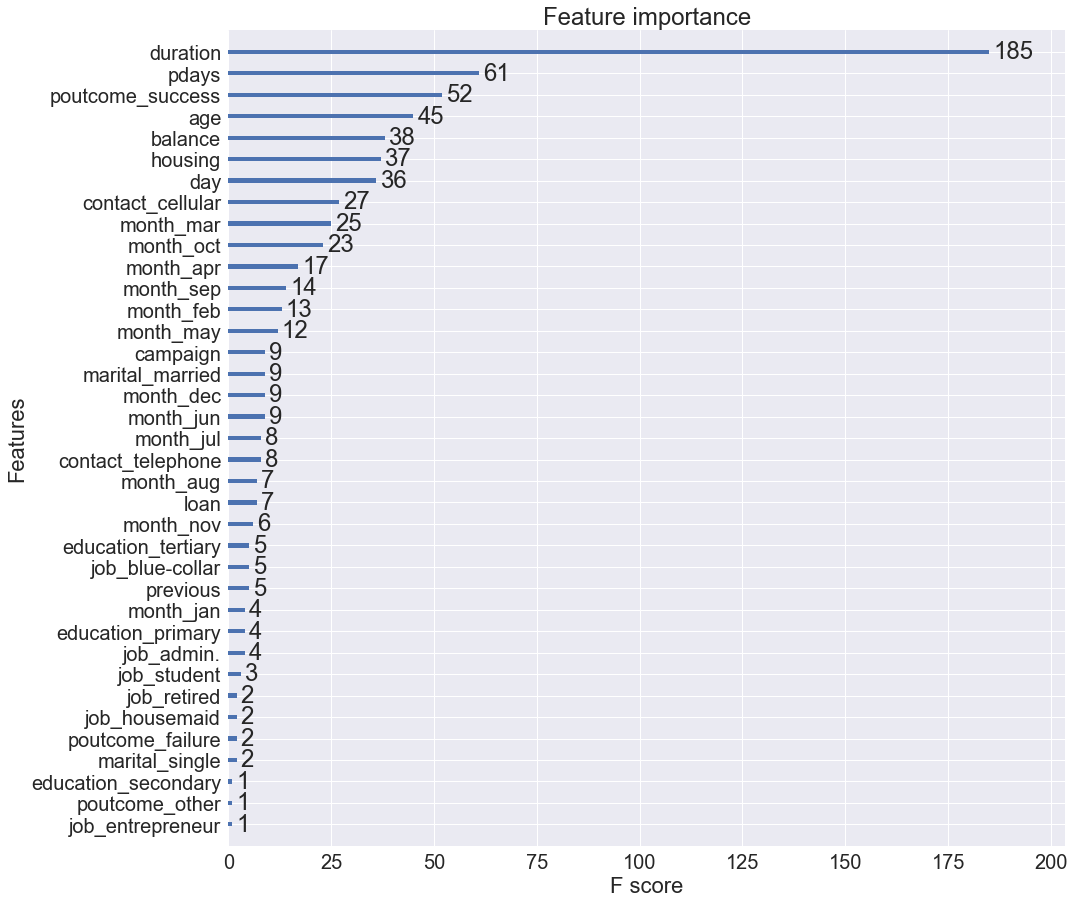

In [52]:
%matplotlib inline
import seaborn as sns
from xgboost import plot_importance
sns.set(font_scale = 2.0)
# ax = plot_importance(xgb)
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(15,15)

# selecting the best model for robustness after tuning parameters

I would like to select the best model through the help of confusion matrix.Confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing

In [53]:
# Select best model
# Make predictions on validation dataset using tuned parameters
tuned_model = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=6, gamma=0.1,subsample=1, 
                            colsample_bytree=1, colsample_bylevel=1)
tuned_fit = tuned_model.fit(X_train, y_train)
tuned_pred = tuned_model.predict(X_validation)

print("Accuracy Score: ",accuracy_score(y_validation, tuned_pred))
print("Confusion Matrix: \n",confusion_matrix(y_validation, tuned_pred))
print("Classification Report: \n",classification_report(y_validation, tuned_pred))

Accuracy Score:  0.9069947470279237
Confusion Matrix: 
 [[15523   446]
 [ 1236   880]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     15969
          1       0.66      0.42      0.51      2116

avg / total       0.90      0.91      0.90     18085



C:\Users\Admin\.VPN Unlimited\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# CONCLUSION AND IMPROVEMENT

Now,by the confusion matrix i would like to conlcude that intially my benchmark model performance was 0.8998064694498203 but when after i tuned the model and also by tuning the parameters i got the accuracy score as 0.9069947470279237 which was improved but it can improved much better by applying various tuning parameters like tuning lambda,tuning sub samples and variouss things however i would like to conclude that the thing that i got much better results and i am satisified with my result.